<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведем-данные-в-столбцах-к-нужным-типам" data-toc-modified-id="Приведем-данные-в-столбцах-к-нужным-типам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведем данные в столбцах к нужным типам</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры." data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры.</a></span></li><li><span><a href="#Топ-10-населенных-пунктов-по-количеству-объявлений" data-toc-modified-id="Топ-10-населенных-пунктов-по-количеству-объявлений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Топ 10 населенных пунктов по количеству объявлений</a></span></li><li><span><a href="#Квартиры-Санкт-Петербурга" data-toc-modified-id="Квартиры-Санкт-Петербурга-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Квартиры Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотики необходимые для работы, в том числе для построения графиков 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

Прочитаем файл с данными и посмотрим первые 5 строк таблицы. Предварительный просмотр предоставленных данных показал, что в качестве разделителя столбоцов используется символ "\". Поэтому добавим разделитель по которому определять столбцы в метод read_csv.

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Из первых 5 строк таблицы можно увидеть какие изменения с данными нам предстоит сделать: заполнить пропущенные значения, изменить количественный тип данных на целочисленные значения int, изменить тип данных даты столбца "first_day_exposition" на datetime.

Посмотрим сводную информацию по таблице методом info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Из сводной таблицы видно, что присутствут пропуски во многих столбцах. Общее количество записей 23699. А, например, в столбце 'is_aprtment' присутствует только 2775. 

Применим метод describe для получения сводной информации по количественным данным.

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим корректны ли названия столбцов и нет ли в них лишних символов.

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия столбцов корректны, лишних символов не обнаружено. Можно приступать к предобработке данных.

### Вывод

Поступившие для анализа данные были приведены к формату dataframe. Была рассмотрена сводная информация по типам данных и структуре таблицы. 

## Предобработка данных

Посмотрим на количество пропущенных значений в исходной таблице. 

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропущенные значения столбца ceiling_height средним значением выборки

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Заполним пропущенные значения жилой площади (living_area). Для начала посмотрим с каким параметром коррелирует эти значения.

In [ ]:
df[['living_area', 'kitchen_area', 'total_area', 'rooms']].corr()

,living_area,kitchen_area,total_area,rooms
living_area,1.000000,0.428674,0.939537,0.845977
kitchen_area,0.428674,1.000000,0.609121,0.269945
total_area,0.939537,0.609121,1.000000,0.758344
rooms,0.845977,0.269945,0.758344,1.000000


Видно, что количество комант в квартире сильно коррелирует с жилой площадью. Сгруппируем данные по количеству комнат и найдем по каждому значению медиану жилой площади. Далее заменим пропуски этими значениями.

In [ ]:
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

С пропусками по столбцу площадь кухни kitchen_area немного сложнее. Подобрать нужный параметр для группировки довольно сложно из-за слабой корреляции. Для нашего анализа точность этих значений не сильно скажется на результате, поэтому заполним пропуски медианой.

In [ ]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

Значения в столбце is_apartment принимают одно из двух значений True или False, где первое подтверждает, что это апартаменты, а второе, что это квартира. Так как на результаты выводов эти данные влияния не оказывают запоним пропущенные данные значением False 

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna('False')

Столбец "balcony" показывает количество балконов в квартире. Вероятно пропуски связаны с тем, что балкон в квартире отсутствует, поэтому пропуски заполним нулем

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Значения в столбце locality_name показывают к какому населенному пункту принадлежит та или иная квартира. Так как по этому признаку квартиры сильно различаются в цене, а количество пропущенных значений меньше 0,5 % от общего количества данных, то эти строки лучше удалить.

In [ ]:
df.dropna(subset=['locality_name'], inplace=True)
df.reset_index(drop=True, inplace=True)

Небольшое количество пропусков в столбце floors_total заполним медианным значением, характерным для каждого населенного пункта. И добавим функцию, которая не допускает, чтобы этаж квартиры был больше количества этажей всего дома.

In [ ]:
df['floors_total'] = df.groupby('locality_name')['floors_total'].apply(lambda x: x.fillna(x.median()))

In [ ]:
def floors(row):
    if row['floor'] > row['floors_total']:
        return row['floor']
    return row['floors_total']

In [ ]:
df['floors_total'] = df.apply(floors, axis=1)

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Значения в столбце days_exposition оставим с пропусками без изменения, так как пропуски никак не коррелируют с другими признакми. Для оценки корреляции пропуски нам не помешают.

Картографически данные удаленности объекта от центра, парка, аэрапорта и водоемов в таблице заполнены автоматически, поэтому пропуски возможно связаны с техническими проблемами определения геоданных локации, которая выставляется на продажу. Для этих пропусков не подобрать логичную замену, поэтому оставим их без изменения. 

В то же время, отсутствующие значения в стобцах parks_around3000 и ponds_around3000 вероятнее всего свидетельствуют о том, что рядом с квартирой этих объектов нет, поэтому логичным решением будет заполнить пропуски нулем.

In [ ]:
df['parks_around3000'].fillna(0, inplace=True)
df['ponds_around3000'].fillna(0, inplace=True)

Посмотрим нашу таблицу после всех преобразований.

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

### Приведем данные в столбцах к нужным типам

Приведем значения до целых чисел там, где не требуется точность десятичных дробей.

In [ ]:
dict_int_columns = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
df[dict_int_columns] = df[dict_int_columns].astype('int')

Также в нашей таблице есть значения соответствующие дате и времени. Приведем их в удобный для работы формат datetime

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

Округлим значения стобца ceiling_height до первого знака после запятой

In [ ]:
df['ceiling_height'] = df['ceiling_height'].round(1)

Проверим измененную таблицу

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           8064 non-null float64
ponds_around30

## Расчёты и добавление результатов в таблицу

Проведем расчеты с таблицей и найдем цену квадратного метра. Результат вычисления сохраним в новый стобец 

In [ ]:
df['price_per_metre2'] = (df['last_price'] / df['total_area']).astype('int')

In [ ]:
df['price_per_metre2'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_per_metre2, dtype: int64

Определим день недели, месяц и год публикации объявления и добавим по каждому из этих признаков новый столбец.

In [ ]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Поделим данные по этажности квартиры на 3 группы: первый, другой, последний и добавим эти категории в новый столбец. Напишем функцию, которая принимает значения заданных столбцов, а возвращает категорию. Далее применим эту функцию к нашему dataframe и запишем данные в новый столбец.

In [ ]:
def fl(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row ['floors_total']:
        return 'последний'
    return 'другой'

In [ ]:
df['floor_category'] = df.apply(fl, axis=1)

In [ ]:
df['floor_category'].value_counts()

другой       17371
последний     3367
первый        2912
Name: floor_category, dtype: int64

Посчитаем отношение жилой и общей площади. Добавим результат в новый столбец rate_living_total

In [ ]:
df['rate_living_total'] = (df['living_area'] / df['total_area']).round(1)

Проделаем тоже самое для кухни. Добавим в стобец rate_kitchen_total отношение площади кухни к общей площади.

In [ ]:
df['rate_kitchen_total'] = (df['kitchen_area'] / df['total_area']).round(1)

In [ ]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metre2,weekday_exposition,month_exposition,year_exposition,floor_category,rate_living_total,rate_kitchen_total
766,0,5500000,42.0,2018-07-24,1,2.6,10,15.0,7,False,...,0,NaN,115.0,130952,1,7,2018,другой,0.4,0.2
12983,8,3350000,29.4,2019-04-11,1,2.5,5,15.1,5,False,...,0,NaN,NaN,113945,3,4,2019,последний,0.5,0.2
12443,4,7365000,79.2,2017-11-17,2,2.6,3,50.2,3,False,...,0,NaN,22.0,92992,4,11,2017,последний,0.6,0.2
19077,20,8299000,83.0,2019-03-07,3,2.6,9,50.0,3,False,...,0,NaN,37.0,99987,3,3,2019,другой,0.6,0.1
9461,1,4200000,48.7,2017-12-25,2,2.6,9,29.8,5,False,...,0,NaN,63.0,86242,0,12,2017,другой,0.6,0.1


## Исследовательский анализ данных

Посмотрим как наши данные распределяются на гистограмме. Нас интересуют следующие параметры: площадь, цена, число комнат, высота потолков.

Для упрощения построения гистограмм напишем функцию, которая будет строить гистограмму по заданному столбцу датафрейма. Также автоматизируем построение диаграммы размаха. 

In [ ]:
def hist(data, column):
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    data[column].hist(bins=100, range=(data[column].min(), q3 + 3*iqr))
    plt.title('Гистограмма по стобцу: ' + column)
    plt.show()
    
def boxplot(data, column):
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    data.boxplot(column)
    plt.ylim(q1 - 1.5*iqr, q3 + 3*iqr)
    plt.title('Диаграмма размаха по стобцу: ' + column)

Теперь посмотрим на распределение данных в интересующих нас столбцах. Начнем со стобца общей площади квартиры total_area.

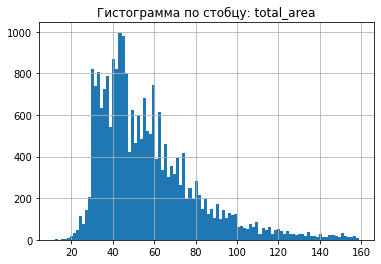

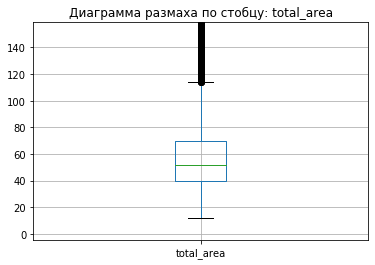

In [ ]:
hist(df, 'total_area')
boxplot(df, 'total_area')

Посмотрим на данные по цене продажи квартиры last_price

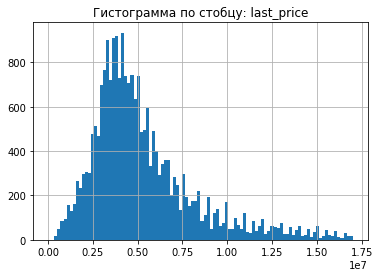

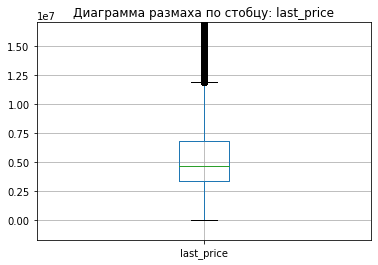

In [ ]:
hist(df, 'last_price')
boxplot(df, 'last_price')

In [ ]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Гистограмма по цене продажи имеет очень длинный хвост. Исходя из диаграммы размаха сделаем фильтр по верхней границе нормальных значений: 12 млн руб. 

In [ ]:
df['living_area'].describe()

count    23650.000000
mean        34.313121
std         21.708464
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

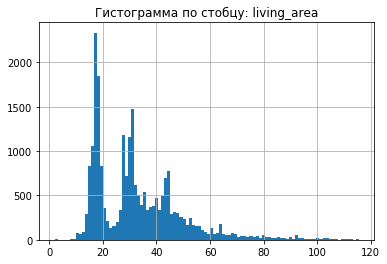

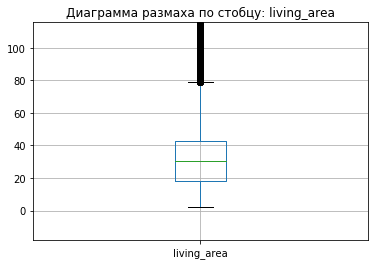

In [ ]:
hist(df, 'living_area')
boxplot(df, 'living_area')

Гистогрмма по площади кухни.

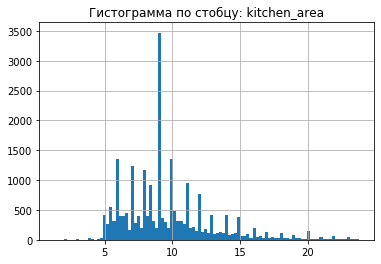

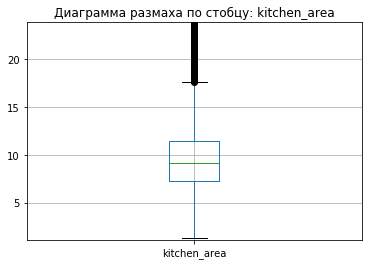

In [ ]:
hist(df, 'kitchen_area')
boxplot(df, 'kitchen_area')

Гистогрмма по значениям столбца количества комнат в квартире.

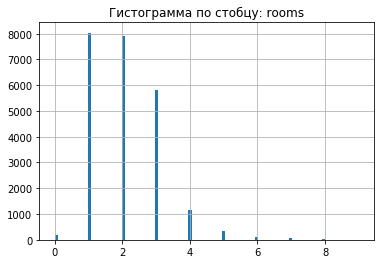

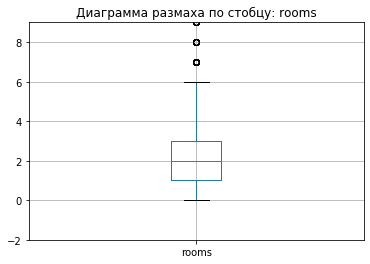

In [ ]:
hist(df, 'rooms')
boxplot(df, 'rooms')

Гистограмма по высоте потолков в квартире

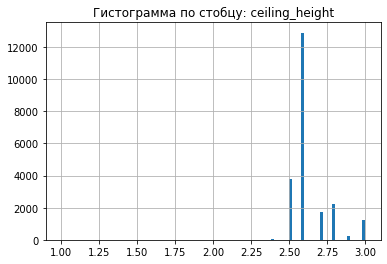

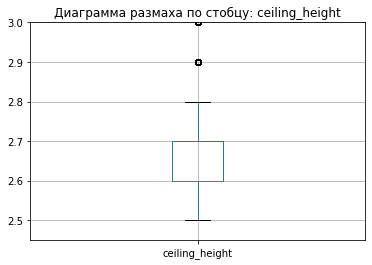

In [ ]:
hist(df, 'ceiling_height')
boxplot(df, 'ceiling_height')

Посмотрим на гистограмму по времени продажи квартиры days_exposition 

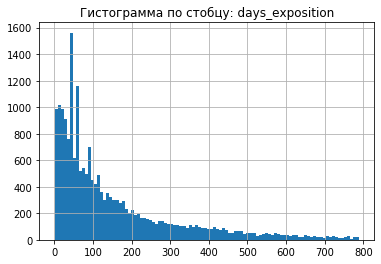

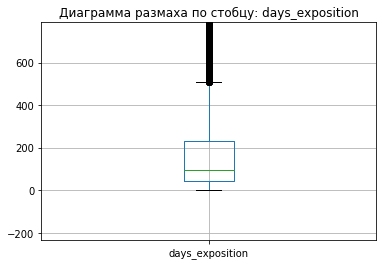

In [ ]:
hist(df, 'days_exposition')
boxplot(df, 'days_exposition')

In [ ]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Гистограмма имеет характерное распределение Пуассона. Большой пик в области до 100 дней и длинный хвост вплоть до 1500 дней. 

Половина объявлений о продаже квартиры закрываются в период от 45 до 95 дней и 75 % в срок до 231 дней. Если посмотреть аналитические отчеты о рынке недвижимости, то увидим, что такая оценка отражает действительность и большинство квартир распродаются в течении 3-х месяцев. Длительность продажи больше 500 дней - за границей нормальных значений будем считать необычно большим временем продажи.

Посмотрим на квартиры, которые продались очень быстро. Сделаем срез наших данных по длительности продажи меньше 45 дней и посмотрим на количество объявлений.

Text(0.5, 0, 'Дней продажи')

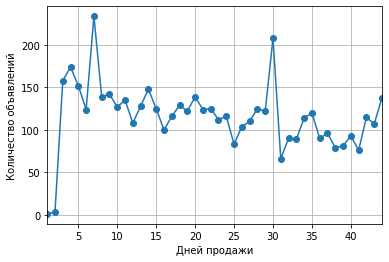

In [ ]:
df.query('days_exposition < 45').pivot_table(index='days_exposition', values='rooms', aggfunc='count').plot(legend=False, style='o-', grid=True)
plt.ylabel('Количество объявлений')
plt.xlabel('Дней продажи')

По графику количества объявлений от длительности продажи квартиры видно, что квартир, проданных меньше 3 дней очень мало. Это и будет границей ниже которой продажи прошли аномально быстро. 

Отфильтруем нашу таблицу от редких, аномальных значений, опираясь на гистограммы и диаграммы размаха по столбцам стоимости, площади и количеству комнат в квартире. Главная задача отбросить значения искажающие усредненные по рынку данные. 
Так мы получим выборку по интересующим нас параметрам, получив при этом наиболее однородные данные. Сохраним новый датафрейм в переменной df_filtered

In [ ]:
df_filtered = df.query('3 < days_exposition < 500 and rooms < 6 and 15 < total_area < 120')
df_filtered.index = range(len(df_filtered))

###  Факторы влияющие на стоимость квартиры. 

Главной целью данного анализа является выявление параметров, которые наиболее влияют на стоимость квартиры. Эти параметры будут главными при оценке рыночной стоимости квартиры. Далее рассмотрим, как цена зависит от: общей площади, числа комнат в квартире, удаленности от центра и этажа квартиры.

Построим функцию, которая будет строить графики по заданным стобцам нового датафрейма.

In [ ]:
def chart(x, y, kind, title):
    df_filtered.plot(x=x, y=y, kind=kind, alpha=0.3, legend=True, grid=True, title=title)

1. Общая площадь

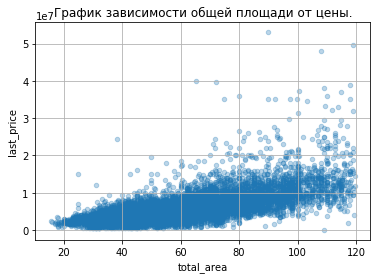

In [ ]:
chart('total_area', 'last_price', 'scatter', 'График зависимости общей площади от цены.')

По графику видна прямая корреляция площади от цены хотя и не очень наглядно. Сгруппируем данные по побщей плошади и посчитаем медиану. Результат выведем на график. 

Выделим 3 категории квартир: до 40 кв.м, от 40 до 80 кв.м, от 80 до 120 кв.м. Для них найдем медианную цену и выведем на график.

In [ ]:
df_filtered['total_area_cat'] = pd.cut(df_filtered['total_area'], 3, labels=["to_40", "to_80", "to_120"])

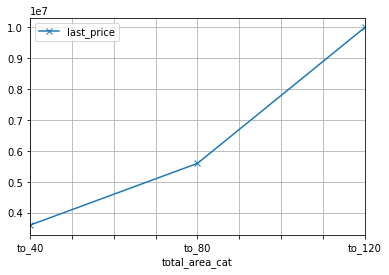

In [ ]:
df_filtered.pivot_table(index='total_area_cat', values='last_price', aggfunc='median').plot(style='x-', grid=True)

Этот график более наглядно показывает увеличение цены. И посчитаем коээфициент корреляции, чтобы удостовериться в зависимости.

In [ ]:
print('Коэффициент корреляции равен: ', df_filtered['total_area'].corr(df_filtered['last_price']).round(2))

Коэффициент корреляции равен:  0.7


Зависимость подтверждена. 

2. Число комнат в квартире

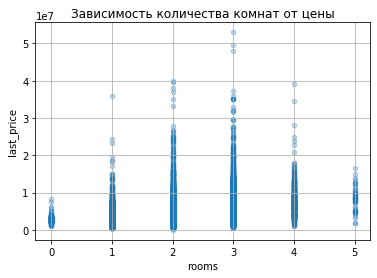

In [ ]:
chart('rooms', 'last_price', 'scatter', 'Зависимость количества комнат от цены')

График не очень нагляден. Сгруппируем данные по количеству комнат и посчитаем для каждой группы медиану. Результат выведем на график.

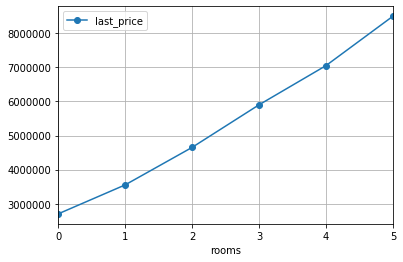

In [ ]:
df_filtered.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True)

Количество комнат также оказывает влияние на рыночную стоимость квартир. 

3. Удаленность квартиры от центра.

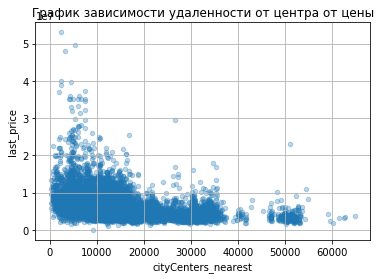

In [ ]:
chart('cityCenters_nearest', 'last_price', 'scatter', 'График зависимости удаленности от центра от цены')

Добавим категории для квартир в зависимости от удаленности от центра. Например, категория квартир А - это квартиры в радиусе 10 000 м от центра и т.д. Далее по каждой категории посчитаем медианное значение цены и построим зависимость.

In [ ]:
df_filtered['cityCenters_cat'] = pd.cut(df_filtered['cityCenters_nearest'], 6, labels=["a", "b", "c", "d", "e", "f"]).copy(deep=True)

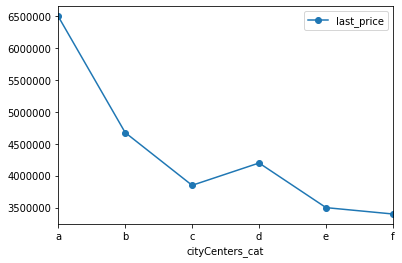

In [ ]:
df_filtered.pivot_table(index='cityCenters_cat', values='last_price', aggfunc='median').plot(style='o-')

Стоимость квартиры резко возрастает с границы в 30 км (категория с). До этой границы тоже заметно возрастание цены. Можно сделать вывод о влиянии расстояния до центра города на стоимости квартиры.

4. Зависимость этажа квартиры от стоимости.

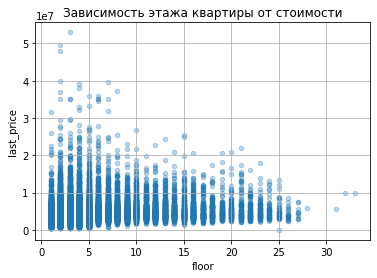

In [ ]:
#df_filtered['floor_type'] = df_filtered['floor_category'].replace({'первый' : 1, 'другой' : 2, 'последний' : 3})
chart('floor', 'last_price', 'scatter', 'Зависимость этажа квартиры от стоимости')
#df_filtered.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.3)

Воспользуемся группировкой по категориям этажа квартиры. Мы выделили 3 категории: первый, другой, последний. Сравним медианное значение стоимости квартиры для этих категорий.

In [ ]:
df_filtered.pivot_table(index='floor_category', values='last_price', aggfunc='median')

,last_price
floor_category,
другой,4550000
первый,3750000
последний,4100000


Первый этаж ожидаемо оказывает влияние на стоимость квартиры. В среднем цена на такие квартиры ниже на 20%, чем на этажах выше.

5. Зависимоть стоимости квартиры от даты размещения

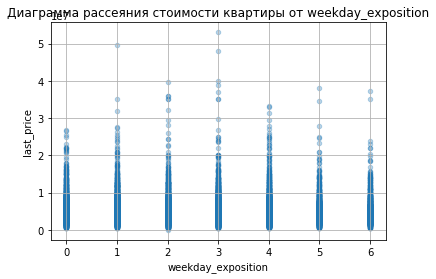

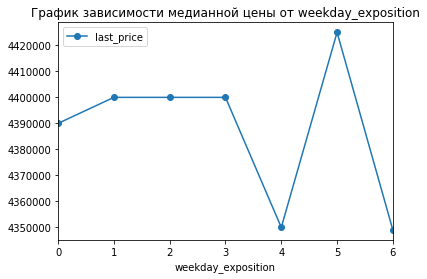

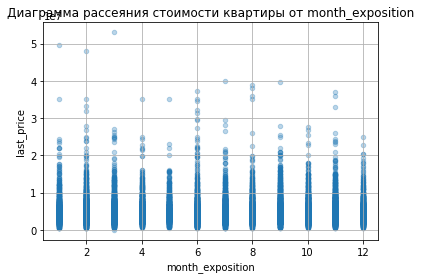

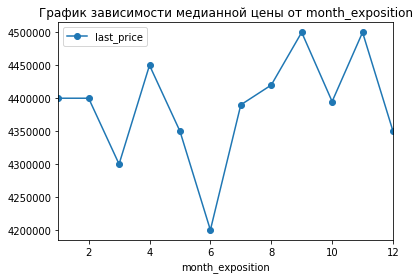

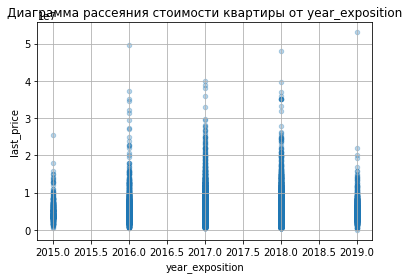

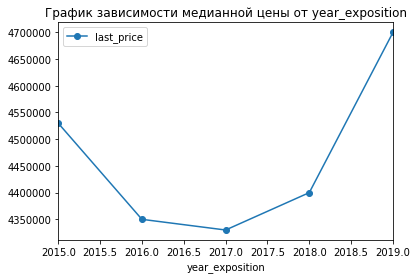

In [ ]:
key = ['weekday_exposition', 'month_exposition', 'year_exposition']
for column in key:
    chart(column, 'last_price', 'scatter', 'Диаграмма рассеяния стоимости квартиры от ' + column)
    df_filtered.pivot_table(index=column, values='last_price', aggfunc='median').plot(style='o-', title='График зависимости медианной цены от ' + column)

Дата размещения квартиры не сильно оказывает влияние на колебания цены квартиры. Хотя можно заменить небольшое снижение цены в 2016 и 2017 годах.  

### Топ 10 населенных пунктов по количеству объявлений

Выберим 10 населённых пунктов с наибольшим числом объявлений. Отсортируем таблицу по средней стоимости квадратного метра. Посмотрим на самые дорогие и дешевые населенные пункты.

In [ ]:
top10_exposition = df_filtered.pivot_table(index='locality_name', values='price_per_metre2', aggfunc=['count', 'mean'])
top10_exposition.columns = ['count', 'mean_price_per_metre']
top10_exposition['mean_price_per_metre'] = top10_exposition['mean_price_per_metre'].astype('int')
top10_exposition = top10_exposition.sort_values('count', ascending=False).head(10)
top10_exposition.sort_values('mean_price_per_metre', ascending=False)

,count,mean_price_per_metre
locality_name,,
Санкт-Петербург,11811,108462
Пушкин,267,101188
деревня Кудрово,266,92656
посёлок Парголово,286,89360
посёлок Мурино,485,86069
посёлок Шушары,384,77923
Колпино,291,74711
Всеволожск,306,68681
Гатчина,241,68274


Санкт-Петербург ожидаемо занимает первое место по стоимости квадратного метра. Удивительно, что г. Пушкин не сильно отстает от Питера, тогда как Выборг ниже по стоимости почти в 2 раза. Посмотрим как данные расположаться на графике.

Text(0.5, 1.0, 'Средняя стоимость квадратного метра по населенным пунктам')

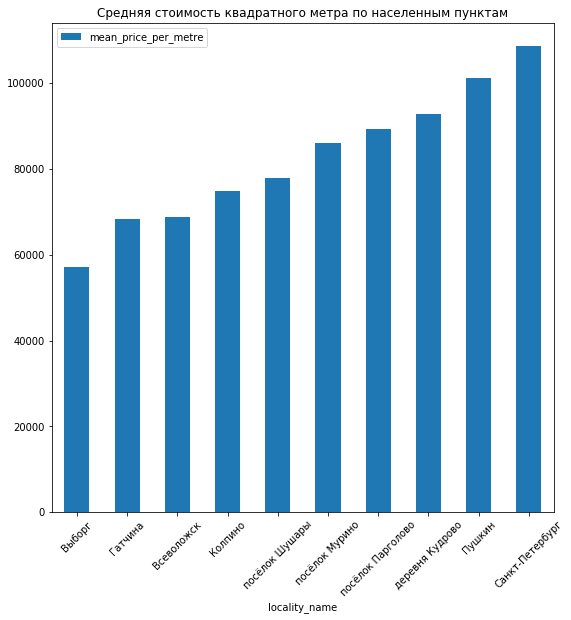

In [ ]:
top10_exposition.sort_values('mean_price_per_metre').plot(use_index=True, y='mean_price_per_metre', style='o-', figsize=(9, 9), kind='bar')
plt.xticks(rotation=45)
plt.title('Средняя стоимость квадратного метра по населенным пунктам')

### Квартиры Санкт-Петербурга

Рассмотрим квартиры Санкт-Петербурга. Узнаем, как расстояние до центра влияет на стоимость квартиры. Для этого сначала выясним, какая область входит в центр. 
Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. Результат запишем в столбец "cityCenters_nearest_km". После этого посчитаем среднюю цену для каждого километра. Постром график и определим границу, где график сильно меняется — это и будет центральная зона.

In [ ]:
df_piter = df_filtered.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna() == False').reset_index(drop=True)
df_piter['cityCenters_nearest_km'] = (df_piter['cityCenters_nearest'] / 1000).round(0)
df_piter['price_per_km'] = (df_piter['price_per_metre2'] / df_piter['cityCenters_nearest_km']).round(0)
df_piter_pivot = df_piter.pivot_table(index='cityCenters_nearest_km', values='price_per_km')


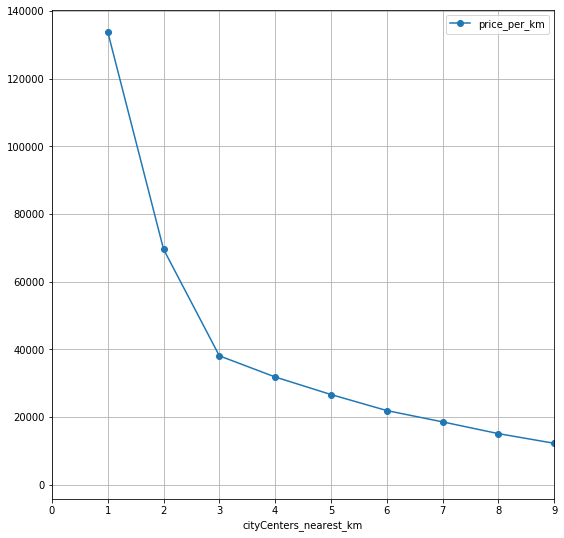

In [ ]:
df_piter_pivot.plot(style='o-', grid=True, figsize=(9, 9), xlim=(0, 9))

По графику видно, что резкий рост цен начинается с 4 км до центра - это и будет центральная область города Санкт-Петербург.

Посмотрим сегмент квартир в центре. Проанализируем эту территорию по следующим параметрам: площадь, цена, число комнат, высота потолков. 

Для начала разделим нашу таблицу по квартирам из Питера на 2 категории: квартиры в центре и квартиры другие.

In [ ]:
def center(x):
    if x < 4:
        return 'центр'
    return 'другой'

In [ ]:
df_piter['piter_area'] = df_piter['cityCenters_nearest_km'].apply(center)

Посмотрим гистограммы для квартир в Питере для интересующих нас параметров. Сравним эти параметры для квартир в центре и других квартир.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


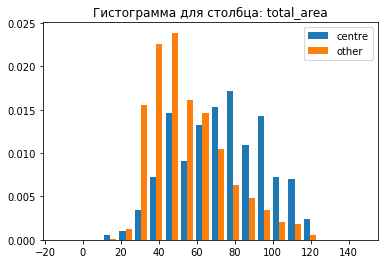

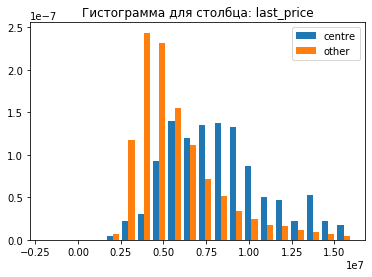

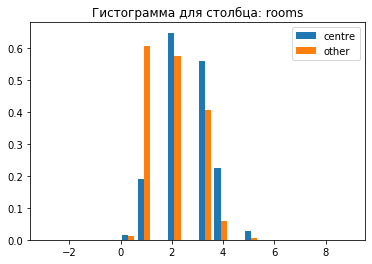

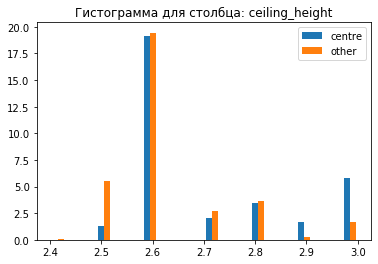

In [ ]:
piter_column = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in piter_column:
    q3 = df_piter[column].quantile(0.75)
    q1 = df_piter[column].quantile(0.25)
    iqr = q3 - q1
    centre = df_piter.query('piter_area == "центр"')[column]
    other = df_piter.query('piter_area == "другой"')[column]
    plt.hist([centre, other], density=True, bins=20, range=(q1 - 2*iqr, q3 + 3*iqr))
    plt.title('Гистограмма для столбца: ' + column)
    plt.legend(['centre', 'other'])
    plt.show()

Из графиков видно, что в среднем квартиры в центре дороже на 20 %. Также для таких квартир характерна площадь квартиры больше 50 кв.м, что отличает от квартир в других районах. Также квартиры в центре чаще всего имеют две и более комнат.

Теперь посмотрим на факторы, которые влияют на стоимость квартир в центре. Сравним их с другими квартирами. Выделим следующие параметры: число комнат, этаж, удалённость от центра, дата размещения объявления.

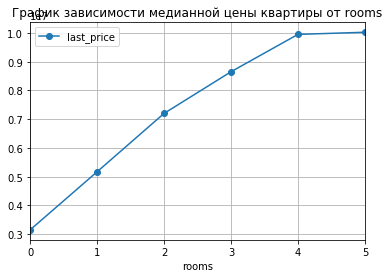

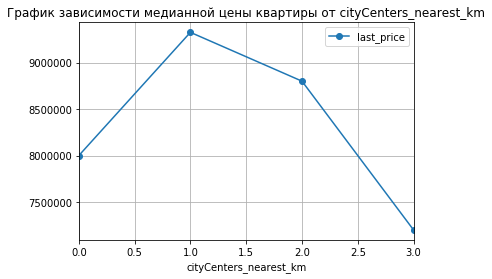

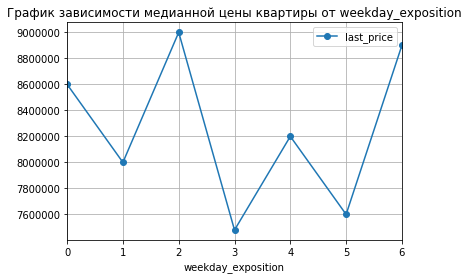

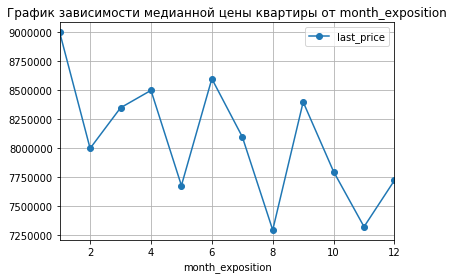

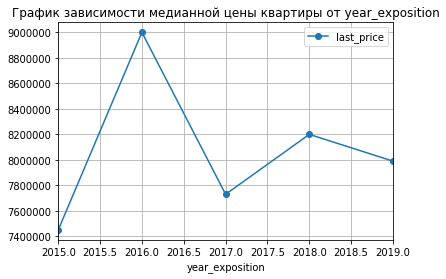

In [ ]:
parametric = ['rooms', 'cityCenters_nearest_km', 'weekday_exposition', 'month_exposition', 'year_exposition']
for column in parametric:
    df_piter.query('piter_area == "центр"').pivot_table(index=column, values='last_price', aggfunc='median').plot(style='o-', grid=True)
    plt.title('График зависимости медианной цены квартиры от ' + column)

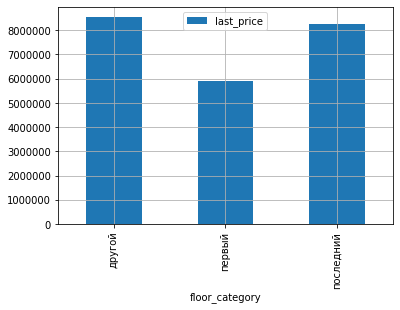

In [ ]:
df_piter.query('piter_area == "центр"').pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(kind='bar', style='o-', grid=True)

В целом параметры оказывающие влияние на цену характерны и для квартир в центре. Можно утверждать, что каких-то особых факторов влияющих на цену квартир в центре нет.

Посмотрим на коэффициенты корреляции.

In [ ]:
df_piter[['rooms', 'cityCenters_nearest_km', 'weekday_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()

,rooms,cityCenters_nearest_km,weekday_exposition,month_exposition,year_exposition,last_price
rooms,1.000000,-0.186200,-0.003620,0.002749,-0.055077,0.437640
cityCenters_nearest_km,-0.186200,1.000000,-0.004213,0.008591,0.040267,-0.375979
weekday_exposition,-0.003620,-0.004213,1.000000,-0.004494,0.004490,0.003635
month_exposition,0.002749,0.008591,-0.004494,1.000000,-0.233333,-0.011084
year_exposition,-0.055077,0.040267,0.004490,-0.233333,1.000000,0.002507
last_price,0.437640,-0.375979,0.003635,-0.011084,0.002507,1.000000


## Общий вывод

Главной целью анализа было выявление параметров, оказывающих влияние на рыночную стоимость квартиры. Для этого данные были предобработаны и подготовлены для исследовательского анализа.

В ходе исследования были сделаны следующие выводы:

* На основе данных о длительности продажи было выявлено, что среднее время продажи составляет 95 дней. Характерный разброс значений находится в диапазоне от 45 до 230 дней. Аномально долгие продажи приходятся на срок более 500 дней. Аномально быстрых продаж оказало гораздо меньше и они находятся в интервале до 3 дней. 

* Были определены признаки, оказывающие влияние на стоимость квартир: общая площадь, количество комнат, удаленность от центра, этаж квартиры. В результате группировки по этим показателям была замечана сильная корреляция с ценой квартиры.

* Больше половины объявлений приходятся на 10 населенных пунктов. Для каждого из них была определена характерная цена среднего квадратного метра. ТОП 3 по стоимости: Санкт-Петербург, Пушкин, деревня Кудрово.

* В Санкт-Петербурге определена центральная область и радиус в 4 км, отделяющая центральный район от остального. Именно с 4 км цена за квадратный метр начинает сильно возрастать. 

* Квартиры в центре Санкт-Петербурга зависят равно от тех же параметров, что и квартиры в среднем по объявлениям. 